In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
col_names = ["age",
        "work_class",
        "final_weight",
        "education",
        "education_num",
        "marital_status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "captial_gain",
        "captial_loss",
        "hours_per_week",
        "native_country",
        "label"]
df = pd.read_csv("data/adult.data", names=col_names)
df.columns

Index(['age', 'work_class', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'captial_gain', 'captial_loss', 'hours_per_week', 'native_country',
       'label'],
      dtype='object')

In [3]:
label = df['label'].tolist()
new_label = [1.0 if lb == ' >50K' else 0.0 for lb in label]
df['label'] = new_label

In [4]:
df = df[(df.astype(str) != ' ?').all(axis=1)]
df = df.reset_index()

In [5]:
occlist = df['occupation'].tolist()

def OccupationMapping (occpation):
    if (occpation in [' Exec-managerial', ' Prof-specialty']):
        return occpation
    else:
        return ' Occu-others'

new_occ_name = [OccupationMapping (oc) for oc in occlist]
df['occupation2'] = new_occ_name

In [6]:
rellist = df['relationship'].tolist()

def RelationshipMapping (relaiton):
    if (relaiton in [' Husband', ' Wife']):
        return ' Husband/Wife'
    else:
        return ' Relation-others'

new_rel_name = [RelationshipMapping (re) for re in rellist]
df['relationship2'] = new_rel_name

In [7]:
marlist = df['marital_status'].tolist()

def MaritalMapping (marital):
    if (marital != ' Married-civ-spouse' and marital != ' Married-AF-spouse'):
        return ' Married'
    else:
        return ' Marital-others'

new_mar_name = [MaritalMapping (ma) for ma in marlist]
df['marital_status2'] = new_mar_name

In [8]:
edu_num = df['education_num'].tolist()

def EduNumMapping (edunum):
    #if (edunum < 9.0): # School level
    #    return 1.0
    if (edunum < 13.0): # Below Bachelors
        return 1.0
    elif (edunum == 13.0): # Bachelors
        return 2.0
    else:                 # Above Bachelors
        return 3.0

new_edu_num = [EduNumMapping (en) for en in edu_num]
df['education_num2'] = new_edu_num

In [9]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(df["occupation2"])
#pd.DataFrame(lb_results, columns=lb_style.classes_).head(20)
lb.classes_

df = df.join(pd.DataFrame(lb_results, columns=lb.classes_, index=df.index))
df.columns

Index(['index', 'age', 'work_class', 'final_weight', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       'native_country', 'label', 'occupation2', 'relationship2',
       'marital_status2', 'education_num2', ' Exec-managerial', ' Occu-others',
       ' Prof-specialty'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['relationship2'] = le.fit_transform(df['relationship2'])
df['marital_status2'] = le.fit_transform(df['marital_status2'])
df['work_class'] = le.fit_transform(df['work_class'])
df.columns

Index(['index', 'age', 'work_class', 'final_weight', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       'native_country', 'label', 'occupation2', 'relationship2',
       'marital_status2', 'education_num2', ' Exec-managerial', ' Occu-others',
       ' Prof-specialty'],
      dtype='object')

In [11]:
def MappingCountryToContinent (country):
    if country in [' Taiwan', ' Iran', ' India', ' Japan', ' Hong', ' China', ' South']:
        return ' East-Mid Asia'
    elif country in [' Cambodia', ' Philippines', ' Thailand', ' Vietnam']:
        return ' South Asia'
    elif country in [' France', ' Yugoslavia', ' Italy', ' England', ' Germany', ' Greece', ' Hungary', ' Ireland', ' Poland', ' Scotland', ' Portugal', ' Holand-Netherlands']:
        return ' Europe'
    elif country in [' Canada', ' United-States', ' Outlying-US(Guam-USVI-etc)']:
        return ' North America'
    else:
        return ' Mid-South America'
    
countries = df['native_country'].tolist ()
continent = [MappingCountryToContinent(co) for co in countries]

df['continent'] = continent

lb = LabelBinarizer()
lb_results = lb.fit_transform(df["continent"])
lb.classes_

df = df.join(pd.DataFrame(lb_results, columns=lb.classes_, index=df.index))

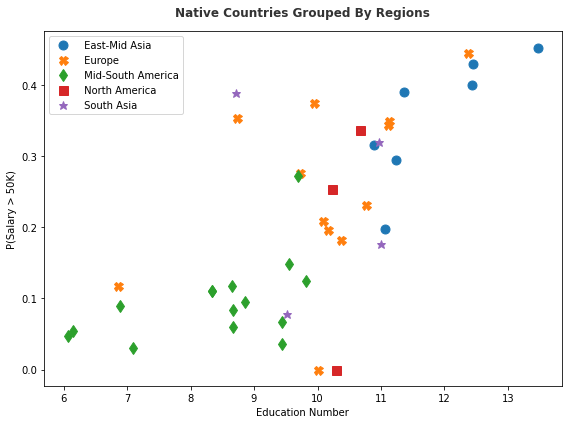

In [13]:
df_country = df.groupby(['native_country']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_country = df_country.reset_index ().rename(columns={"index": "count"})

countries = df_country['native_country'].tolist ()
continent = [MappingCountryToContinent(co) for co in countries]

df_country['continent'] = continent

marker = {' East-Mid Asia':'o', ' South Asia':'*', ' Europe':'X', ' North America':'s', ' Mid-South America':'d'}

filter = df_country['count'] > 10

df_country.where (filter)

countryData = df_country[['continent', 'education_num', 'label', 'native_country']].sort_values(by=['continent'], ascending=True).values

#size
fig, ax = plt.subplots()
fig.set_size_inches (8,6)

countryDict = {}
for i in range (countryData.shape[0]):
    countryDict.setdefault(countryData[i][0], []).append(countryData[i][1:].tolist ())

for c in countryDict.keys ():

    df_count = pd.DataFrame (countryDict[c], columns=['education_num', 'label', 'country']).reset_index()
    
    plt.plot(df_count['education_num'], df_count['label'], marker[c], label=c, markersize = 9)

#title and labels
plt.title("Native Countries Grouped By Regions", pad=15, color='#333333', weight='bold')
plt.ylabel('P(Salary > 50K)')
plt.xlabel('Education Number')

plt.legend(loc="best")
plt.tight_layout ()
plt.show()

In [91]:
df.isnull().any ()

index                 False
age                   False
work_class            False
final_weight          False
education             False
education_num         False
marital_status        False
occupation            False
relationship          False
race                  False
sex                   False
captial_gain          False
captial_loss          False
hours_per_week        False
native_country        False
label                 False
occupation2           False
relationship2         False
marital_status2       False
education_num2        False
 Exec-managerial      False
 Occu-others          False
 Prof-specialty       False
continent             False
 East-Mid Asia        False
 Europe               False
 Mid-South America    False
 North America        False
 South Asia           False
dtype: bool

In [92]:
import statistics

def StandardizeList (ls):
    mean = statistics.mean (ls)
    std = statistics.stdev (ls)
    return [(item - mean) / std for item in ls]

df['captial_gain'] = StandardizeList (df['captial_gain'].tolist())
df['captial_loss'] = StandardizeList (df['captial_loss'].tolist())

In [93]:
df.columns

Index(['index', 'age', 'work_class', 'final_weight', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       'native_country', 'label', 'occupation2', 'relationship2',
       'marital_status2', 'education_num2', ' Exec-managerial', ' Occu-others',
       ' Prof-specialty', 'continent', ' East-Mid Asia', ' Europe',
       ' Mid-South America', ' North America', ' South Asia'],
      dtype='object')

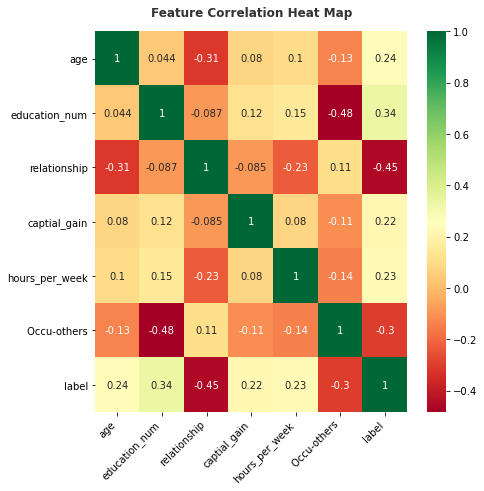

In [94]:
import seaborn as sns
df_corr = df[['age', 'education_num', 'relationship2', 
       'captial_gain', 'hours_per_week',
       ' Occu-others',
       'label']]

df_corr = df_corr.rename (columns={"relationship2": "relationship"})
df_corr

corr_matrix = df_corr.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(7,7))
hmap=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#title and labels
plt.title("Feature Correlation Heat Map", pad=15, color='#333333', weight='bold')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [95]:
df.columns

Index(['index', 'age', 'work_class', 'final_weight', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       'native_country', 'label', 'occupation2', 'relationship2',
       'marital_status2', 'education_num2', ' Exec-managerial', ' Occu-others',
       ' Prof-specialty', 'continent', ' East-Mid Asia', ' Europe',
       ' Mid-South America', ' North America', ' South Asia'],
      dtype='object')

In [96]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
allfeatures = df[['age',
       'education_num', 'relationship2', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       ' Exec-managerial', ' Occu-others',
       ' Prof-specialty', ' East-Mid Asia', ' Europe',
       ' Mid-South America', ' North America', ' South Asia']]

allfeatures = allfeatures.rename (columns={"relationship2":"relationship"})

ETC.fit(allfeatures.values,y)
print(ETC.feature_importances_)
impfeatures = pd.Series(ETC.feature_importances_, index=allfeatures.columns)
impfeatures

[0.22487618 0.12365257 0.20639454 0.01399589 0.02989697 0.11893814
 0.03937647 0.14052513 0.01811233 0.05309578 0.01846247 0.00169368
 0.00180056 0.00452492 0.00336416 0.00129022]


age                   0.224876
education_num         0.123653
relationship          0.206395
race                  0.013996
sex                   0.029897
captial_gain          0.118938
captial_loss          0.039376
hours_per_week        0.140525
 Exec-managerial      0.018112
 Occu-others          0.053096
 Prof-specialty       0.018462
 East-Mid Asia        0.001694
 Europe               0.001801
 Mid-South America    0.004525
 North America        0.003364
 South Asia           0.001290
dtype: float64

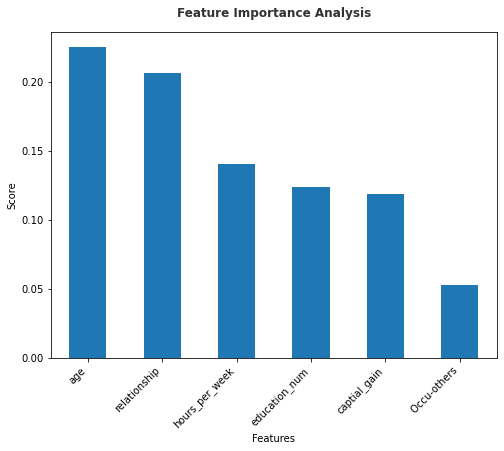

In [97]:

#size
fig, ax = plt.subplots()
fig.set_size_inches (8,6)


impfeatures.nlargest(6).plot(kind='bar', ax=ax)

#title and labels
plt.title("Feature Importance Analysis", pad=15, color='#333333', weight='bold')
plt.ylabel('Score')
plt.xlabel('Features')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [98]:
df_full = df.groupby(['occupation2', 'education_num2'])['occupation2'].count().unstack('education_num2')
df_gt50k = df[df['label']==1.0].groupby(['occupation2', 'education_num2'])['occupation2'].count().unstack('education_num2')
df_lt50k = df[df['label']==0.0].groupby(['occupation2', 'education_num2'])['occupation2'].count().unstack('education_num2')

sorted_index = [' Occu-others', ' Prof-specialty', ' Exec-managerial']

df_gt50k = df_gt50k.div(df_full.sum(axis=1), axis=0)
df_lt50k = df_lt50k.div(df_full.sum(axis=1), axis=0)

df_gt50k = df_gt50k.reindex(sorted_index)
df_lt50k = df_lt50k.reindex(sorted_index)

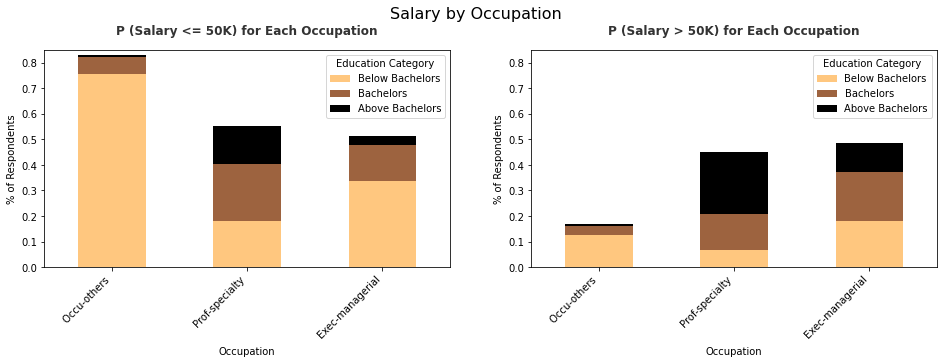

In [99]:
#size
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches (16,4)

#df.groupby(['occupation', 'education_num2'])['occupation'].count().unstack('education_num2').plot(kind='bar', stacked=True, ax=ax)

df_lt50k.plot(kind='bar', stacked=True, ax=ax1, cmap="copper_r")

ax1.legend(['Below Bachelors', 'Bachelors', 'Above Bachelors'], title='Education Category', loc='best')

#title and labels

fig.suptitle('Salary by Occupation', fontsize=16,y=1.03)

ax1.set_title("P (Salary <= 50K) for Each Occupation", pad=15, color='#333333', weight='bold')
ax1.set_ylabel('% of Respondents')
ax1.set_xlabel('Occupation')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

df_gt50k.plot(kind='bar', stacked=True, ax=ax2, cmap="copper_r")

ax2.legend(['Below Bachelors', 'Bachelors', 'Above Bachelors'], title='Education Category', loc='best')

#title and labels
ax2.set_title("P (Salary > 50K) for Each Occupation", pad=15, color='#333333', weight='bold')
ax2.set_ylabel('% of Respondents')
ax2.set_xlabel('Occupation')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


x1,x2,y1,y2 = plt.axis()
ax1.axis((x1,x2,0.0,0.85))
ax2.axis((x1,x2,0.0,0.85))

plt.show()

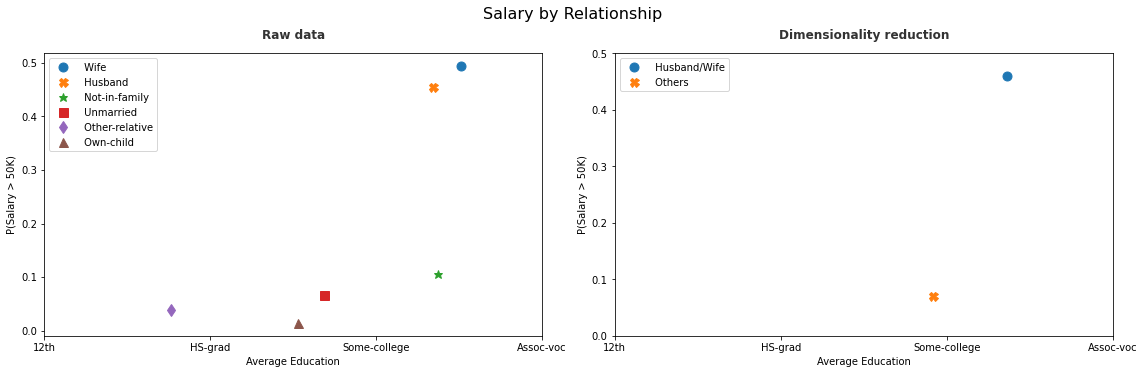

In [100]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches (16,5)


df_rel = df.groupby(['relationship']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_rel = df_rel.reindex()

label = {0:(' Wife','o'), 1:(' Husband','X'), 2:(' Not-in-family','*'), 3:(' Unmarried','s'), 4:(' Other-relative','d'), 5:(' Own-child','^')}

for i in range (df_rel.shape[0]):
    ax1.plot(df_rel.iloc[i][0], df_rel.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
fig.suptitle('Salary by Relationship', fontsize=16,y=1.03)

ax1.set_title("Raw data", pad=15, color='#333333', weight='bold')
ax1.set_ylabel('P(Salary > 50K)')
ax1.set_xlabel('Average Education')

ax1.xaxis.set_ticks(np.arange(8, 12, 1.0))
ax1.set_xticklabels(('12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax1.legend(loc="best")


df_rel = df.groupby(['relationship2']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_rel = df_rel.reindex()

label = {0:(' Husband/Wife','o'), 1:(' Others','X')}

for i in range (df_rel.shape[0]):
    ax2.plot(df_rel.iloc[i][0], df_rel.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
ax2.set_title("Dimensionality reduction", pad=15, color='#333333', weight='bold')
ax2.set_ylabel('P(Salary > 50K)')
ax2.set_xlabel('Average Education')

ax2.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax2.xaxis.set_ticks(np.arange(8, 12, 1.0))
ax2.set_xticklabels(('12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax2.legend(loc="best")

plt.tight_layout ()
plt.show()

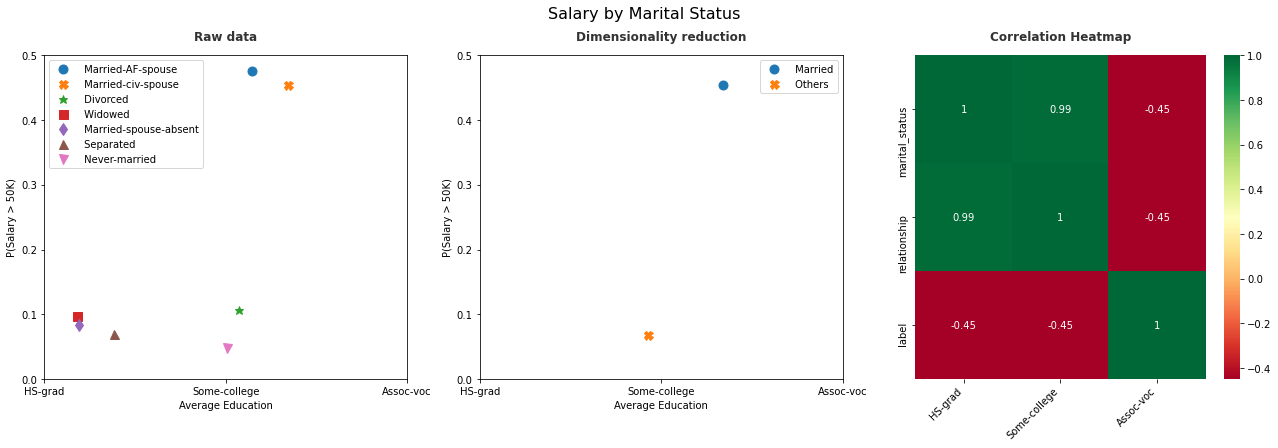

In [101]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches (18,6)


df_mat = df.groupby(['marital_status']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_mat = df_mat.reindex()

label = {0:(' Married-AF-spouse','o'), 1:(' Married-civ-spouse','X'), 2:(' Divorced','*'), 3:(' Widowed','s'), 4:(' Married-spouse-absent','d'), 5:(' Separated','^'), 6:(' Never-married','v')}

for i in range (df_mat.shape[0]):
    ax1.plot(df_mat.iloc[i][0], df_mat.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
fig.suptitle('Salary by Marital Status', fontsize=16,y=1.03)

ax1.set_title("Raw data", pad=15, color='#333333', weight='bold')
ax1.set_ylabel('P(Salary > 50K)')
ax1.set_xlabel('Average Education')

ax1.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax1.xaxis.set_ticks(np.arange(9, 12, 1.0))
ax1.set_xticklabels(('HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax1.legend(loc="best")

df_mat = df.groupby(['marital_status2']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_mat = df_mat.reindex()

label = {0:(' Married','o'), 1:(' Others','X')}

for i in range (df_mat.shape[0]):
    ax2.plot(df_mat.iloc[i][0], df_mat.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
ax2.set_title("Dimensionality reduction", pad=15, color='#333333', weight='bold')
ax2.set_ylabel('P(Salary > 50K)')
ax2.set_xlabel('Average Education')

ax2.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax2.xaxis.set_ticks(np.arange(9, 12, 1.0))
ax2.set_xticklabels(('HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax2.legend(loc="best")

import seaborn as sns
df_corr = df[['marital_status2', 'relationship2','label']]
df_corr = df_corr.rename (columns={"relationship2": "relationship", "marital_status2": "marital_status"})
corr_matrix = df_corr.corr()
top_corr_features = corr_matrix.index

hmap=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn", ax=ax3)
ax3.set_title("Correlation Heatmap", pad=15, color='#333333', weight='bold')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout ()
plt.show()

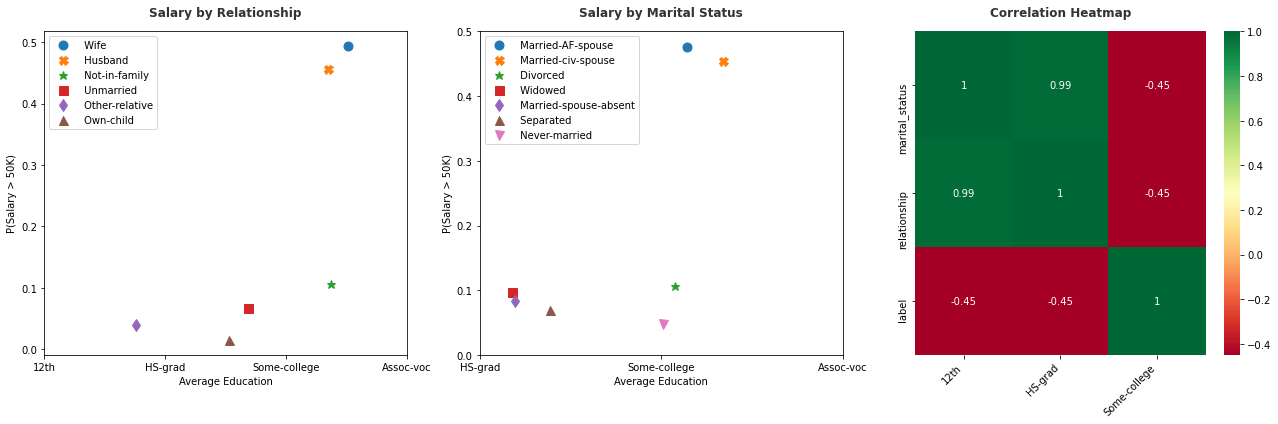

In [102]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches (18,6)

df_rel = df.groupby(['relationship']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_rel = df_rel.reindex()

label = {0:(' Wife','o'), 1:(' Husband','X'), 2:(' Not-in-family','*'), 3:(' Unmarried','s'), 4:(' Other-relative','d'), 5:(' Own-child','^')}

for i in range (df_rel.shape[0]):
    ax1.plot(df_rel.iloc[i][0], df_rel.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
#fig.suptitle('Salary by Relationship', fontsize=16,y=1.03)

ax1.set_title("Salary by Relationship", pad=15, color='#333333', weight='bold')
ax1.set_ylabel('P(Salary > 50K)')
ax1.set_xlabel('Average Education')

ax1.xaxis.set_ticks(np.arange(8, 12, 1.0))
ax1.set_xticklabels(('12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax1.legend(loc="best")


df_mat = df.groupby(['marital_status']).agg({'education_num': 'mean', 'label': 'mean', 'index': 'nunique'}).sort_values(by=['label'], ascending=False)

df_mat = df_mat.reindex()

label = {0:(' Married-AF-spouse','o'), 1:(' Married-civ-spouse','X'), 2:(' Divorced','*'), 3:(' Widowed','s'), 4:(' Married-spouse-absent','d'), 5:(' Separated','^'), 6:(' Never-married','v')}

for i in range (df_mat.shape[0]):
    ax2.plot(df_mat.iloc[i][0], df_mat.iloc[i][1], label[i][1],label=label[i][0], markersize=9)

#title and labels
ax2.set_title("Salary by Marital Status", pad=15, color='#333333', weight='bold')
ax2.set_ylabel('P(Salary > 50K)')
ax2.set_xlabel('Average Education')

ax2.yaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax2.xaxis.set_ticks(np.arange(9, 12, 1.0))
ax2.set_xticklabels(('HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm'))

ax2.legend(loc="best")

import seaborn as sns
df_corr = df[['marital_status2', 'relationship2','label']]
df_corr = df_corr.rename (columns={"relationship2": "relationship", "marital_status2": "marital_status"})
corr_matrix = df_corr.corr()
top_corr_features = corr_matrix.index

hmap=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn", ax=ax3)
ax3.set_title("Correlation Heatmap", pad=15, color='#333333', weight='bold')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout ()
plt.show()


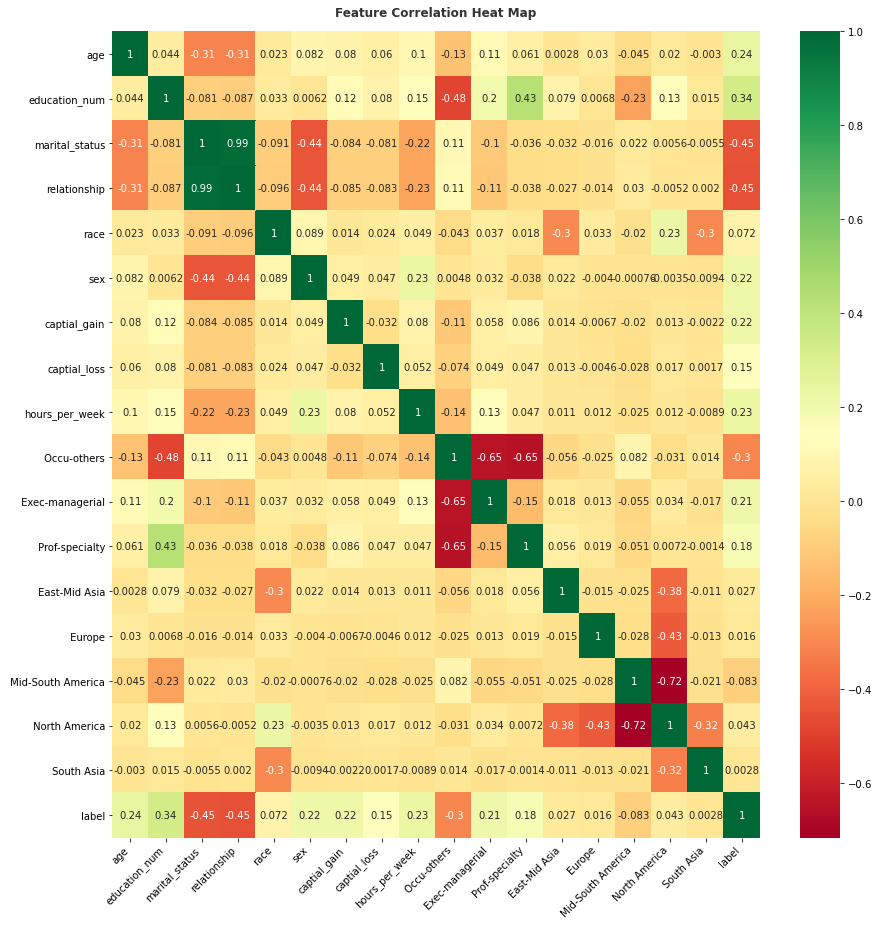

In [103]:
#Generate Heat map of features
import seaborn as sns
df_corr = df[['age', 'education_num', 'marital_status2', 'relationship2', 'race',
       'sex', 'captial_gain', 'captial_loss', 'hours_per_week',
       ' Occu-others', ' Exec-managerial', ' Prof-specialty', ' East-Mid Asia', ' Europe',
       ' Mid-South America', ' North America', ' South Asia','label']]

df_corr = df_corr.rename (columns={"relationship2": "relationship", "marital_status2": "marital_status"})

corr_matrix = df_corr.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(13,13))
hmap=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.title("Feature Correlation Heat Map", pad=15, color='#333333', weight='bold')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout ()
plt.show()

In [104]:
features = df[['age', 'education_num', 'relationship2',
       'captial_gain', 'hours_per_week',
       ' Occu-others']]

X = features.values
y = df['label'].values

In [105]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
accuracymap = {}

In [107]:
#Using Neural Network MLP Classifier, calculate Accuracy score for Important features


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
NNW = MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=2000)
NNW.fit(X_train, y_train.ravel())
nnwpredict = NNW.predict(X_test)
NNW_Imp = accuracy_score(nnwpredict, y_test)
print ('Neural N/W Accuracy Score - Important Features:',NNW_Imp*100)

accuracymap['MLP Neural Network'] = NNW_Imp

Neural N/W Accuracy Score - Important Features: 84.22012265871042


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [0.0 if y < 0.5 else 1.0 for y in y_pred]

df_regresut = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy = np.asarray([1.0 if p[0]==p[1] else 0.0 for p in zip (y_test, y_pred)])
accuracy.mean()

accuracymap['Linear Regression'] = accuracy.mean()

In [109]:
coeff_df = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,0.002912
education_num,0.035774
relationship2,-0.312645
captial_gain,0.058743
hours_per_week,0.002848
Occu-others,-0.120649


In [110]:
import statsmodels.api as sm
from scipy import stats
XWithConst = sm.add_constant(X_train)
est = sm.OLS(y_train, XWithConst)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2075.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:57:13   Log-Likelihood:                -8987.6
No. Observations:               24129   AIC:                         1.799e+04
Df Residuals:                   24122   BIC:                         1.805e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0839      0.018     -4.749      0.0

In [111]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree = dtree.fit(X_train,y_train)
acc = dtree.score(X_test, y_test)

accuracymap['Decision Tree'] = acc

In [112]:
from sklearn import svm
svmclf = svm.SVC(gamma='auto', kernel='rbf')
svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

accuracymap['Support Vector Machine'] = acc

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(29)
knn.fit(X_train, y_train)
acc = knn.score(X_test,y_test)

accuracymap['K Nearest Neighbors (30)'] = acc

In [114]:
accuracymap

{'MLP Neural Network': 0.8422012265871043,
 'Linear Regression': 0.8267860102768109,
 'Decision Tree': 0.848499917122493,
 'Support Vector Machine': 0.8271175203049892,
 'K Nearest Neighbors (30)': 0.8131940991214984}

In [115]:
df_model = pd.DataFrame (accuracymap.items(), columns = ['model', 'accuracy'])

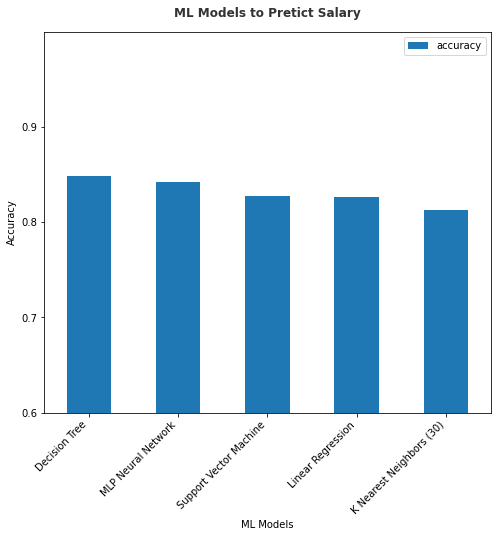

In [116]:
#size
fig, ax = plt.subplots(1, 1, sharex=True)
fig.set_size_inches (8,7)

df_model.sort_values(by='accuracy', ascending=False).plot.bar(x='model', y='accuracy', ax=ax)

#title and labels
plt.title("ML Models to Pretict Salary", pad=15, color='#333333', weight='bold')
plt.ylabel('Accuracy')
plt.xlabel('ML Models')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.ylim([0.6, 1.0])
plt.yticks(np.arange(0.6, 1.0, 0.1))



plt.show()

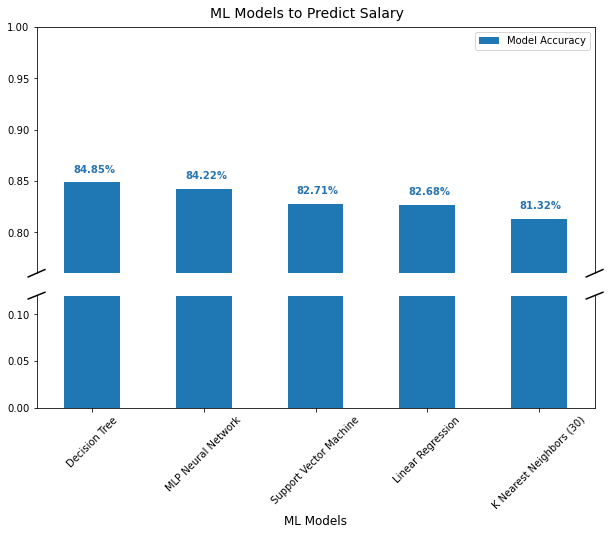

In [117]:
#size
fig = plt.figure()

gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[0:2, :])
ax2 = fig.add_subplot(gs[2, :])

fig.set_size_inches (10,7)

df_model = df_model.sort_values(by='accuracy', ascending=False)
df_model.plot.bar(x='model', y='accuracy', ax=ax1)
df_model.plot.bar(x='model', y='accuracy', ax=ax2)

#title and labels
fig.suptitle('ML Models to Predict Salary', fontsize=14,y=0.92)
#ax.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('')
ax2.set_xlabel('ML Models', fontsize=12)


#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')


# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.76, 1.)  # outliers only
ax2.set_ylim(0, .12)  # most of the data

#ax1.yaxis.set_ticks(np.arange(0.6, 1.01, 0.1))
ax2.yaxis.set_ticks(np.arange(0.0, 0.14, 0.05))

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax1.xaxis.tick_top()
ax1.xaxis.set_ticks_position('none')
ax1.set_xticks([])
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.xaxis.set_tick_params(rotation=45) 

#remove legend
#ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(['Model Accuracy'])


dx = .015
dy = .015

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-dx, +dx), (-dy, +dy), **kwargs)        # top-left diagonal
ax1.plot((1 - dx, 1 + dx), (-dy, +dy), **kwargs)  # top-right diagonal

dx = .015
dy = .03
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-dx, +dx), (1 - dy, 1 + dy), **kwargs)  # bottom-left diagonal
ax2.plot((1 - dx, 1 + dx), (1 - dy, 1 + dy), **kwargs)  # bottom-right diagonal

for i, v in enumerate(df_model['accuracy'].tolist()):
    ax1.text(i - 0.17, v + 0.01, '{:2.2f}%'.format(v*100.0), color='#2773B1', fontweight='bold')